 # Additional Questions

# Exploratory Data Analysis- Team-1

In [2]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Loading the dataset

Patients    = pd.read_excel('patients.xlsx')
EDVisits    = pd.read_excel('EDVisits.xlsx')
AmbulatoryVisits   = pd.read_excel('AmbulatoryVisits.xlsx')
ReAdmissionRegistry    = pd.read_excel('ReAdmissionRegistry.xlsx')
Discharges   = pd.read_excel('Discharges.xlsx')
Providers   = pd.read_excel('Providers.xlsx')
EDUnique    = pd.read_excel('EDUnique.xlsx')


df = pd.read_excel("HospitalDatabase.xlsx", 
                        sheet_name=["Patients","EDVisits","AmbulatoryVisits","ReAdmissionRegistry","Discharges","Providers","EDUnique"])

In [7]:
# sheets names in dataset

df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=['Patients','EDVisits','AmbulatoryVisits','ReAdmissionRegistry','Discharges',
                                                    'Providers','EDUnique'])
df.keys()

dict_keys(['Patients', 'EDVisits', 'AmbulatoryVisits', 'ReAdmissionRegistry', 'Discharges', 'Providers', 'EDUnique'])

# Analysis on Patients sheet

### 1. Explore patients dataset

In [166]:


#Numbers of rows & columns in the data sheet patients.

patients=df['Patients']
patients.shape


(945, 7)

### 2. Display heading

In [169]:
Patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


###Find the duplicates

In [173]:
patients.duplicated().sum()

0

### 3. checking data type of columns

In [170]:
patients.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    float64       
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 51.8+ KB


### 4. unique values

In [187]:
patients['Gender'].unique()

patients['Race'].unique()

patients['Language'].unique()


array(['English', 'Spanish', nan], dtype=object)

### 5.  Plot the unique values

C:\Users\Vaishali\Anaconda-Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

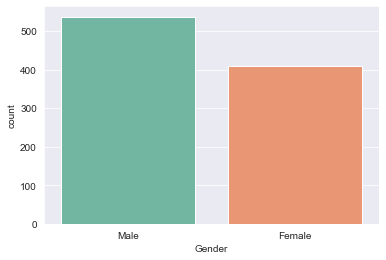

In [183]:


sns.countplot(patients['Gender'])

###  6. there are null values in each column

In [171]:
Patients.isnull().sum()

PatientID      0
FirstName      0
LastName       0
DateOfBirth    0
Gender         0
Race           0
Language       8
dtype: int64

### 7. Analyzing various metrics

In [11]:
patients.describe()


,PatientID
count,945.000000
mean,473.000000
std,272.942302
min,1.000000
25%,237.000000
50%,473.000000
75%,709.000000
max,945.000000


### 8. Filter data

In [192]:
patients[patients['Language']== 'English'].head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1.0,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4.0,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


In [193]:
#Filter data

patients[patients['Language']== 'Spanish'].head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
10,11.0,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish
11,12.0,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish
12,13.0,Skippie,Marriot,1978-05-12 20:12:54.106,Male,White,Spanish
13,14.0,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish
14,15.0,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish


### 9. Plot the unique values of Race

C:\Users\Vaishali\Anaconda-Setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

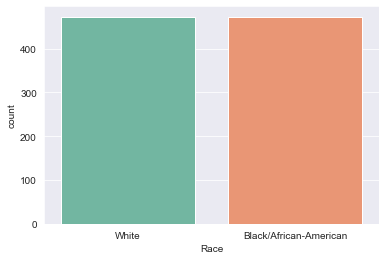

In [195]:
sns.countplot(patients['Race'])

### 10. To visualize number of patients are of which age group.

C:\Users\Vaishali\Anaconda-Setup\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


<AxesSubplot:xlabel='Age', ylabel='PatientID'>

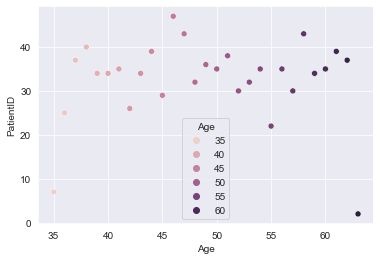

In [17]:
#dataframe used in this :
patients=df['Patients']
type(patients)

#create a parameter called now to calculate age.

now = pd.to_datetime('now')
patients['Age']=(now - patients['DateOfBirth']).astype('<m8[Y]') 
patients.head()

patients_count_age=patients.groupby(['Age'])['PatientID'].count().reset_index()
patients_count_age
#sb.relplot(data=patients, x='Age', y='PatientID', kind='line')
#plt.show()

sb.scatterplot(x='Age', y='PatientID', data=patients_count_age, hue='Age')



## here we see some outliers in the patient's age. patients of age 36 - 37 are way more in number & Age 34-35 have the lowest count


### 11. To visualize language of the patients.

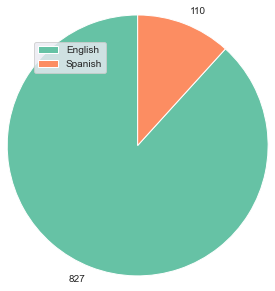

In [246]:
patients_count_race_lang=patients.groupby(['Language'])['PatientID'].count().reset_index()
patients_count_race_lang.head()
plt.pie(patients_count_race_lang["PatientID"], labels= patients_count_race_lang["PatientID"], radius=1.5,startangle=90)
plt.legend(patients_count_race_lang["Language"], loc="best")
plt.show()


## Majority patients are who speaks english.


# Analysis of Patients sheets

# 1.Numbers of rows & columns in the data sheet patients.(945, 7)

# 2.except Language column, there are  no - null values in other columns.

# 3.Do not find any duplicates.

# 4. From matrix analysis -
       # count	945.000000
        # mean	473.000000
        #std	272.942302
        #min	1.000000
        # 25%	237.000000
        # 50%	473.000000
        # 75%	709.000000
        # max	945.000000

# 5.Male patients are more then female patients, in language English are more then spanish but in race all moust equal number of patients in white and Black/African-american.       
        





# Analysis on ED Visits sheet.

### 12. Dataframes used in this :

In [197]:
EDVisits=df['EDVisits']
EDVisits.head()
EDVisits.info()

EDVisits.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EDVisitID        1199 non-null   float64       
 1   PatientID        1199 non-null   float64       
 2   VisitDate        1199 non-null   datetime64[ns]
 3   EDDischargeTime  1199 non-null   datetime64[ns]
 4   Acuity           1199 non-null   float64       
 5   ReasonForVisit   1199 non-null   object        
 6   EDDisposition    1199 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 65.7+ KB


(1199, 7)

### 13. Checking % of Missing values.

In [20]:
EDVisits.isnull().sum() / patients.shape[0] * 100

#  don't have any null values.

EDVisitID          0.0
PatientID          0.0
VisitDate          0.0
EDDischargeTime    0.0
Acuity             0.0
ReasonForVisit     0.0
EDDisposition      0.0
dtype: float64

### 14. Checking if there are any duplicate values in the EDVisitID column

In [199]:
EDVisits.EDVisitID.value_counts()

# There are no duplicates in Patient_Id column



1.0       1
510.0     1
508.0     1
507.0     1
498.0     1
         ..
938.0     1
937.0     1
926.0     1
925.0     1
1189.0    1
Name: EDVisitID, Length: 1199, dtype: int64

### 15. Find the duplicates

In [200]:
EDVisits.duplicated().sum()

0

### 16.  Calculating the EDthroughput hours. time spent by patients in ED

In [26]:
EDVisits.head()


EDVisits['EDThroughput']=EDVisits['EDDischargeTime']-EDVisits['VisitDate']
EDVisits['EDThroughput']=EDVisits['EDThroughput']


EDVisits['EDThroughput'].median()

#11.40 Hrs is the centre value spent in ED by a patient.

Timedelta('0 days 11:40:14.642000')

### 17. calculating the patients based on reason of visit.

In [208]:
ROV = EDVisits.groupby(['ReasonForVisit','EDDisposition'])['PatientID'].count().reset_index()

ROV

,ReasonForVisit,EDDisposition,PatientID
0,Accident,Admitted,39
1,Bleeding,Admitted,16
2,Bleeding,Discharged,15
3,Car Accident,Admitted,17
4,Chest Pain,Admitted,94
5,Chest Pain,Discharged,15
6,Cough,Discharged,1
7,Fever,Admitted,46
8,Fever,Discharged,188
9,Gun Shot,Admitted,16


### 18. count of ED visits based on Reason of visit.

In [206]:
cnt_EDV=EDVisits.groupby(['ReasonForVisit'])['EDVisitID'].count().reset_index()
cnt_EDV

,ReasonForVisit,EDVisitID
0,Accident,39
1,Bleeding,31
2,Car Accident,17
3,Chest Pain,109
4,Cough,1
5,Fever,234
6,Gun Shot,16
7,Intoxication,30
8,Laceration,30
9,Migraine,156


### 19. To calculate Observed mortality : Expected mortality

In [31]:
#Dataframes used in this:

ReAdmissionRegistry

OE_data =ReAdmissionRegistry[(ReAdmissionRegistry['DischargeDisposition']=='Expired')]
OE_data 

OvsE=OE_data['DischargeDisposition'].count() / ReAdmissionRegistry['ExpectedMortality'].sum()

OvsE
print('Observed_mortality : Expected mortality is :' , OvsE)

Observed_mortality : Expected mortality is : 0.4272709474250124


### 20. observed Mortality by Primary diagnosis.

In [32]:
#Using the below data frame
OE_data  #as it contains only the data with DischargeDisposition 'Expired'

OM_PD=OE_data.groupby(['PrimaryDiagnosis'])['DischargeDisposition'].count().reset_index()
OM_PD.head()

,PrimaryDiagnosis,DischargeDisposition
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4


### 21. Boxplot

<AxesSubplot:>

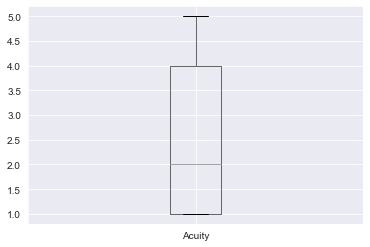

In [209]:

EDVisits[['Acuity']].boxplot()

### 22. Correlation & plot

In [210]:
EDVisits.corr()

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

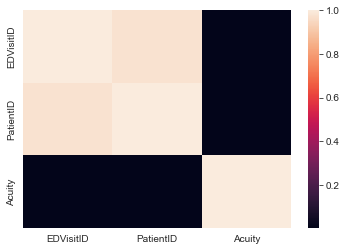

In [211]:
#Correlation plot

sns.heatmap(EDVisits.corr())

# This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.

### Analysis of EDVisits sheets

1.Numbers of rows & columns in the data sheet EDVisits.(1199, 7)

2.There are  no  null values in other columns.

3.Do not find any duplicates.

4. 11.40 Hrs is the centre value spent in ED by a patients.

5.Observed_mortality : Expected mortality ratio is 0.42.

6. co-relation with EDVisitID, PatientsID and Acuity shows in a heat map.

# Analyzing Ambulatory visits sheet

### 23. dataframes used in this:

In [212]:
AmbulatoryVisits= df['AmbulatoryVisits']

AmbulatoryVisits.info()

AmbulatoryVisits.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   VisitID                 950 non-null    float64       
 1   PatientMRN              950 non-null    float64       
 2   ProviderID              950 non-null    float64       
 3   DateofVisit             950 non-null    datetime64[ns]
 4   DateScheduled           950 non-null    datetime64[ns]
 5   VisitDepartmentID       950 non-null    float64       
 6   VisitType               950 non-null    object        
 7   BloodPressureSystolic   826 non-null    float64       
 8   BloodPressureDiastolic  826 non-null    float64       
 9   Pulse                   826 non-null    float64       
 10  VisitStatus             950 non-null    object        
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 81.8+ KB


(950, 11)

In [34]:
AmbulatoryVisits.isnull().sum() / patients.shape[0] * 100

VisitID                    0.000000
PatientMRN                 0.000000
ProviderID                 0.000000
DateofVisit                0.000000
DateScheduled              0.000000
VisitDepartmentID          0.000000
VisitType                  0.000000
BloodPressureSystolic     13.121693
BloodPressureDiastolic    13.121693
Pulse                     13.121693
VisitStatus                0.000000
dtype: float64

In [213]:
AmbulatoryVisits.describe()

,VisitID,PatientMRN,ProviderID,VisitDepartmentID,BloodPressureSystolic,BloodPressureDiastolic,Pulse
count,950.000000,950.000000,950.000000,950.000000,826.000000,826.000000,826.000000
mean,475.500000,592.648421,18.638947,7.252632,155.815981,106.841232,74.464751
std,274.385677,345.126034,11.392470,3.262549,20.508743,23.219744,14.419596
min,1.000000,4.000000,1.000000,1.000000,120.000000,51.695653,50.072068
25%,238.250000,93.250000,9.000000,5.000000,137.000000,88.066185,62.282399
50%,475.500000,813.500000,18.000000,7.000000,156.000000,107.460231,73.642034
75%,712.750000,871.000000,29.000000,10.000000,174.000000,123.740114,86.417593
max,950.000000,917.000000,40.000000,12.000000,190.000000,157.296683,99.986463


### 24. Ambulance Visits KPI - based on visit status

In [35]:
AmbulatoryVisits.head()

AV_KPI=AmbulatoryVisits.groupby(['VisitStatus'])['VisitID'].count().reset_index()
AV_KPI

,VisitStatus,VisitID
0,Canceled,60
1,Completed,736
2,No Show,154


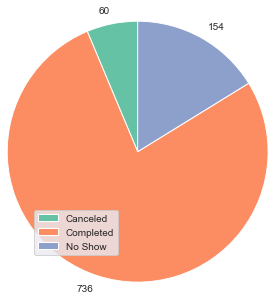

In [36]:
plt.pie(AV_KPI["VisitID"], labels= AV_KPI["VisitID"], radius=1.5,startangle=90)
plt.legend(AV_KPI["VisitStatus"], loc="best")
plt.show()


### 25. Finding the correlation between the coulumns in AmbulatoryVisits

In [39]:
matrix=AmbulatoryVisits.corr()
matrix


,VisitID,PatientMRN,ProviderID,VisitDepartmentID,BloodPressureSystolic,BloodPressureDiastolic,Pulse
VisitID,1.000000,0.519586,-0.039377,0.131367,-0.015248,-0.010427,0.004948
PatientMRN,0.519586,1.000000,0.020446,0.011503,-0.032377,-0.021439,0.030192
ProviderID,-0.039377,0.020446,1.000000,0.016292,0.000766,0.007212,-0.102517
VisitDepartmentID,0.131367,0.011503,0.016292,1.000000,0.023426,0.041818,0.009064
BloodPressureSystolic,-0.015248,-0.032377,0.000766,0.023426,1.000000,0.864880,0.044034
BloodPressureDiastolic,-0.010427,-0.021439,0.007212,0.041818,0.864880,1.000000,0.046617
Pulse,0.004948,0.030192,-0.102517,0.009064,0.044034,0.046617,1.000000


### 26. Visualizing the correlation.

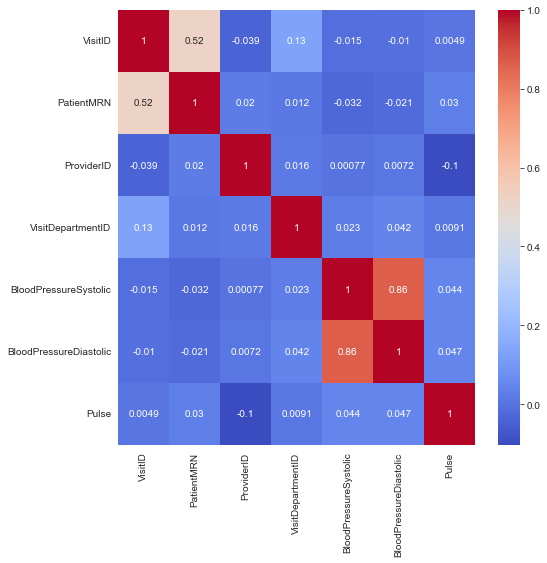

In [40]:
plt.figure(figsize=(8,8))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
dataplot = sb.heatmap(AmbulatoryVisits.corr(), cmap="coolwarm", annot=True)

# Analysis on ReAdmissionRegistry sheet.

### 27.Numbers of rows & columns in the data sheet ReAdmissionRegistry.

In [214]:
ReAdmissionRegistry=df['ReAdmissionRegistry']
ReAdmissionRegistry.shape

(720, 12)

In [215]:
ReAdmissionRegistry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AdmissionID                720 non-null    float64       
 1   PatientID                  720 non-null    float64       
 2   AdmissionDate              720 non-null    datetime64[ns]
 3   DischargeDate              720 non-null    datetime64[ns]
 4   DischargeDisposition       720 non-null    object        
 5   Service                    720 non-null    object        
 6   PrimaryDiagnosis           720 non-null    object        
 7   ExpectedLOS                720 non-null    float64       
 8   ExpectedMortality          720 non-null    float64       
 9   ReadmissionFlag            194 non-null    float64       
 10  DaysToReadmission          194 non-null    float64       
 11  EDVisitAfterDischargeFlag  341 non-null    float64       
dtypes: datet

In [216]:
ReAdmissionRegistry.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,366.158333,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,218.223501,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,175.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,353.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,557.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,742.000000,16.998213,0.989945,1.0,19.000000,1.0


In [217]:
ReAdmissionRegistry.duplicated().sum()

0

### 28.Seeing Patient_ID column in both Patients & ReAdmissionRegistry sheet.

In [218]:
# Joining the Patients & ReAdmissionRegistry sheet with common column PatientID to get some insights.

dfnew_inner= pd.merge(patients,ReAdmissionRegistry, on='PatientID', how='inner')
dfnew_inner.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1.0,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,2.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,3.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,5.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,6.0,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,640.0,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


In [219]:
#Doing the below as a part of data cleaning. which will enable us to analyze better.

dfnew_inner['DischargeDate'] = pd.to_datetime(dfnew_inner['DischargeDate'])
dfnew_inner['dis_Date'], dfnew_inner['dis_Time'] = dfnew_inner['DischargeDate'].dt.normalize(), dfnew_inner['DischargeDate'].dt.time
dfnew_inner.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,dis_Date,dis_Time
0,1.0,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,2018-01-04,19:59:31.391000
1,2.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,635.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,21:28:51.898000
2,3.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,606.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,22:28:23.672000
3,5.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,587.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,05:47:04.933000
4,6.0,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,640.0,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,2018-01-05,14:18:30.029000


### 29.Viewing the data based on discharge disposition & Primary Diagnosis:

In [220]:
data_based_dd_pd=dfnew_inner.groupby(['DischargeDisposition','PrimaryDiagnosis'])['PatientID'].count().reset_index()
data_based_dd_pd.head()

,DischargeDisposition,PrimaryDiagnosis,PatientID
0,Expired,AMI,6
1,Expired,Afib,4
2,Expired,Broken Leg,3
3,Expired,Diabetes,9
4,Expired,Fever,4


In [51]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


### 30. Visualizing patients based on PrimaryDiagnosis

In [54]:

import matplotlib.pyplot as plt
import squarify 
data_based_dd_pd.head()

a=data_based_dd_pd.groupby('PrimaryDiagnosis')[['PatientID']].count().index.get_level_values(0).tolist()

b=data_based_dd_pd.groupby('PrimaryDiagnosis')[['PatientID']].count().count().reset_index().PatientID.values.tolist()
plt.figure(figsize=(8,8))
plt.title("Patients Based on PrimaryDiagnosis",fontsize=23,fontweight="bold")
squarify.plot(sizes=b, label=a, alpha=.5,pad=True)
plt.axis('off')
plt.show()


NameError: name 'data_based_dd_pd' is not defined

In [231]:
#dataframe used is dfnew_inner.created in above steps. added here for reference.

#dfnew_inner= pd.merge(patients,readmission_reg, on='PatientID', how='inner')
#dfnew_inner.head()

dfnew_inner['LOS'] = (dfnew_inner['dis_Date'] - dfnew_inner['AdmissionDate']).dt.days
dfnew_inner.head()

dfnew_inner['LOS'].mean()

9.534722222222221

### 31. primary diagnosis has the highest values of LOS.

In [233]:
primary_dia_LOS=dfnew_inner.groupby(['PrimaryDiagnosis'])['LOS'].count().reset_index()
primary_dia_LOS

,PrimaryDiagnosis,LOS
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


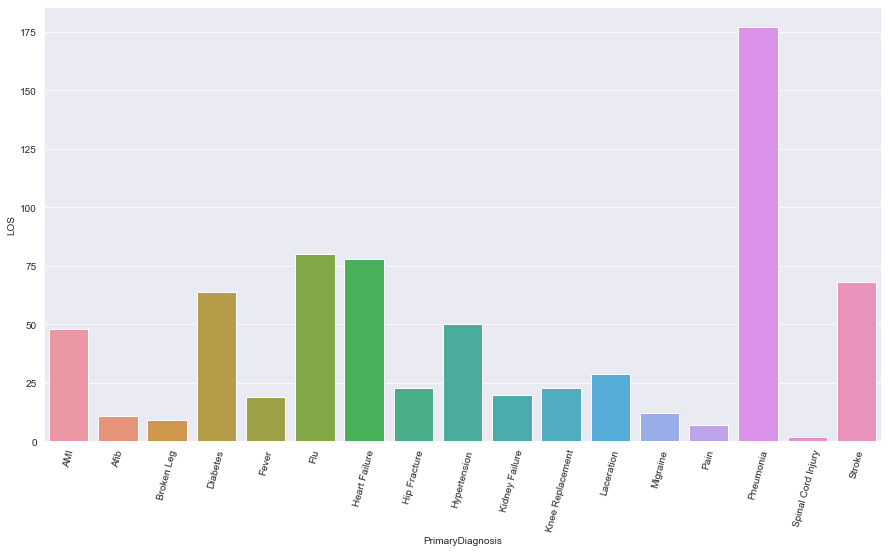

In [234]:
import matplotlib.pyplot as plt
import squarify

plt.figure(figsize=(15,8))
sb.barplot(x = 'PrimaryDiagnosis',y = 'LOS',data =primary_dia_LOS)
plt.xticks(rotation=75)
plt.show()

### 32.Length of Stay by disposition

In [235]:
LOS_by_disp=dfnew_inner.groupby(['DischargeDisposition'])['LOS'].count().reset_index()
LOS_by_disp.head()

,DischargeDisposition,LOS
0,Expired,104
1,Home,577
2,Transfer,39


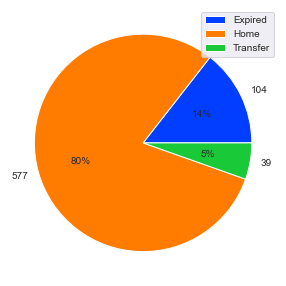

In [241]:
colors = sb.color_palette('bright')[0:5]
plt.figure(figsize=(5,5))
plt.pie(LOS_by_disp["LOS"], labels = LOS_by_disp["LOS"], colors = colors, autopct='%.0f%%')
plt.legend(LOS_by_disp["DischargeDisposition"], loc="best")
plt.show()

<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

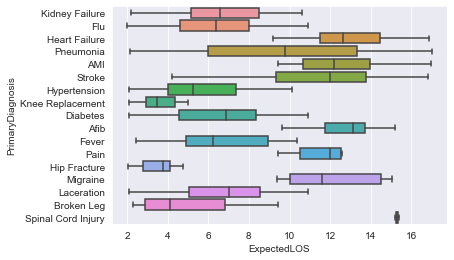

In [242]:
sb.boxplot(x=dfnew_inner.ExpectedLOS,y=dfnew_inner.PrimaryDiagnosis)

### Analysis of ReAdmissionRegistry sheets

1.Numbers of rows & columns in the data sheet ReAdmissionRegistry.(720, 12)

2. Except BloodPressureSystolic, BloodPressureDiastolic and pluse columns ,there are  no  null values in other columns.

3.Do not find any duplicates.

4. Viewing the data based on discharge disposition & Primary Diagnosis.

5. pneumonia patients are highest count = 177.

6. Average Length of stay= 9.53.

7. 80% of patients discharge disposition is home. 14 % of patients are expired.


# Analysis on EDUnique sheet

### 33. load EDUnique dataset


In [4]:
EDUnique    = pd.read_excel('EDUnique.xlsx')
EDUnique

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,discharged
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,discharged
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,discharged
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,discharged


### 34. checking data type of columns

In [5]:
 EDUnique.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EDVisitID        945 non-null    int64         
 1   PatientID        945 non-null    int64         
 2   VisitDate        945 non-null    datetime64[ns]
 3   EDDischargeTime  945 non-null    datetime64[ns]
 4   Acuity           945 non-null    int64         
 5   ReasonForVisit   945 non-null    object        
 6   EDDisposition    945 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 51.8+ KB


### 35. Analyzing various metrics


In [6]:
EDUnique.describe()

,EDVisitID,PatientID,Acuity
count,945.000000,945.000000,945.000000
mean,669.352381,473.000000,2.464550
std,346.115177,272.942302,1.608723
min,1.000000,1.000000,1.000000
25%,338.000000,237.000000,1.000000
50%,727.000000,473.000000,2.000000
75%,963.000000,709.000000,4.000000
max,1199.000000,945.000000,5.000000


### 36. fig out object datatype.


In [7]:
EDUnique.describe(include=['object'])

,ReasonForVisit,EDDisposition
count,945,945
unique,12,4
top,Fever,discharged
freq,172,280


### 38.Explore EDUnique dataset

### Numbers of rows & columns in the data sheet EDUnique.

In [8]:
EDUnique=df['EDUnique']
EDUnique.shape

(945, 7)

### 39.No Missing values in EDUnique dataset

In [9]:
EDUnique.isnull().sum()

EDVisitID          0
PatientID          0
VisitDate          0
EDDischargeTime    0
Acuity             0
ReasonForVisit     0
EDDisposition      0
dtype: int64

### 40. Duplicate values

In [10]:
EDUnique.duplicated().sum()

0

### 41.Datatypes

In [11]:
EDUnique.dtypes

EDVisitID                 float64
PatientID                 float64
VisitDate          datetime64[ns]
EDDischargeTime    datetime64[ns]
Acuity                    float64
ReasonForVisit             object
EDDisposition              object
dtype: object

In [12]:
EDUnique['EDDisposition'].dtypes

dtype('O')

### 42. Filter the data

In [13]:
EDUnique[EDUnique['Acuity']==5].head()

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
7,18.0,18.0,2020-01-01 04:39:40.091,2020-01-02 03:25:07.379,5.0,Car Accident,Admitted
8,19.0,19.0,2020-01-01 04:56:11.608,2020-01-02 04:31:45.968,5.0,Chest Pain,Admitted
9,26.0,26.0,2020-01-01 06:14:46.240,2020-01-01 15:34:00.868,5.0,Chest Pain,Admitted
10,27.0,27.0,2020-01-01 06:27:42.483,2020-01-01 18:30:35.922,5.0,Chest Pain,Admitted
17,45.0,45.0,2020-01-01 11:53:16.342,2020-01-01 21:20:18.854,5.0,Shortness of Breath,admitted


### 43. Box plot using a single line of code Box plot using a single line of code


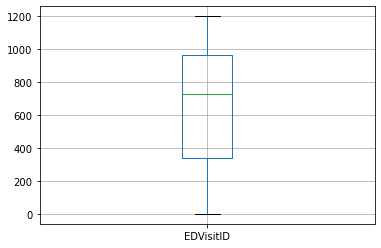

In [15]:

EDUnique[['EDVisitID']].boxplot()
plt.show()

### 44.correlation plot-EDA & plot

In [16]:
EDUnique.corr()

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.988045,-0.085414
PatientID,0.988045,1.000000,-0.087616
Acuity,-0.085414,-0.087616,1.000000


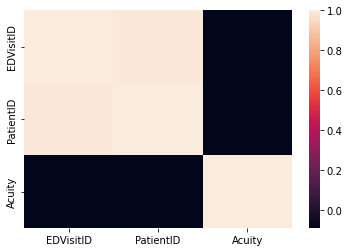

In [17]:
sb.heatmap(EDUnique.corr())
plt.show()

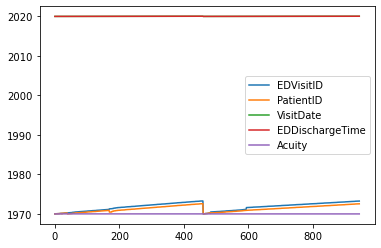

In [47]:
EDUnique.plot()
plt.show()

### 45. Unique values are there in each column.


In [18]:
EDUnique.nunique(axis=0)

EDVisitID          945
PatientID          945
VisitDate          945
EDDischargeTime    945
Acuity               5
ReasonForVisit      12
EDDisposition        4
dtype: int64

### 46. check for 'nans' in each column


In [19]:
EDUnique.isna().sum()

EDVisitID          0
PatientID          0
VisitDate          0
EDDischargeTime    0
Acuity             0
ReasonForVisit     0
EDDisposition      0
dtype: int64

### 47. Statistics for Data analysis

In [20]:
mean1=EDUnique['EDVisitID'].mean()
mean1


669.3523809523809

In [21]:
median1=EDUnique['PatientID'].median()
median1


473.0

In [22]:
mode1=EDUnique['Acuity'].mode()
mode1


0    1.0
Name: Acuity, dtype: float64

In [23]:
Maximum=EDUnique['EDVisitID'].max()
Maximum


1199.0

In [24]:
Minimum=EDUnique['PatientID'].min()
Minimum

1.0

# Analysis on Providers sheet

### 48. Load Providers dataset


In [25]:
Providers    = pd.read_excel('Providers.xlsx')
Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794


### 49.Head() to display first five rows of the dataframe


In [26]:
Providers.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838


### 50. Data types


In [27]:
Providers.dtypes


ProviderID                      int64
ProviderName                   object
ProviderSpecialty              object
ProviderDateOnStaff    datetime64[ns]
dtype: object

In [28]:

#Tail() load the last 5 data set
Providers.tail()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
35,36,Holly Hue,PrimaryCare,2012-06-24 06:55:22.021
36,37,Trent Tye,PrimaryCare,2013-01-12 15:32:21.137
37,38,Kimberly Cone,PrimaryCare,2013-05-23 05:17:19.360
38,39,Harry West,PrimaryCare,2013-07-14 00:22:03.151
39,40,Rosie Renter,PrimaryCare,2013-09-11 12:07:55.584


### 51. Display the column name in dataset

In [30]:
Providers.columns


Index(['ProviderID', 'ProviderName', 'ProviderSpecialty',
       'ProviderDateOnStaff'],
      dtype='object')

In [29]:
# Display the data of a specific column
Providers['ProviderName']

0           Sally Sue
1          Mike Myers
2      Jordan Michael
3           Ted Texas
4            Ala Bama
5          Harry Kane
6           Barry Bar
7           Ted Green
8           Ted Black
9            Fred Man
10       Kim Kimberly
11           Sarah Ab
12    Abigail Marriot
13            Dave Yu
14    Christian Saint
15       Perry Pardon
16       Kent Kendall
17         Ryan Kevin
18       Tyler Conner
19      Bailey Barret
20        Megan Bonco
21      Joesph Walter
22        Walter King
23          Luke Long
24        Justin Time
25        Mike Joseph
26     Bridget Brenda
27        Brenda Bing
28      Chandler Bing
29        Joesph Ross
30       Dwight Scott
31    Michael Halpert
32        Pamela Ding
33         Tony Creed
34    Phyllis Stanley
35          Holly Hue
36          Trent Tye
37      Kimberly Cone
38         Harry West
39       Rosie Renter
Name: ProviderName, dtype: object

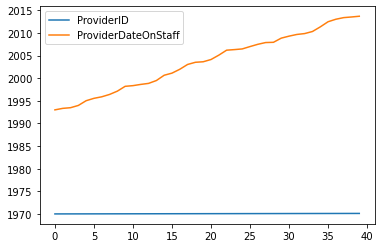

In [32]:
Providers.plot()
plt.show()

# Analysis on Discharges sheet

### 52. Load Discharges dataset

In [33]:
Discharges   = pd.read_excel('Discharges.xlsx')
Discharges

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


### 53.Data type & info

In [34]:
Discharges.dtypes

AdmissionID                      int64
PatientID                        int64
AdmissionDate           datetime64[ns]
DischargeDate           datetime64[ns]
DischargeDisposition            object
Service                         object
PrimaryDiagnosis                object
ExpectedLOS                    float64
ExpectedMortality              float64
dtype: object

In [35]:
Discharges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AdmissionID           720 non-null    int64         
 1   PatientID             720 non-null    int64         
 2   AdmissionDate         720 non-null    datetime64[ns]
 3   DischargeDate         720 non-null    datetime64[ns]
 4   DischargeDisposition  720 non-null    object        
 5   Service               720 non-null    object        
 6   PrimaryDiagnosis      720 non-null    object        
 7   ExpectedLOS           720 non-null    float64       
 8   ExpectedMortality     720 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 50.8+ KB


In [36]:
Discharges.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality
count,720.000000,720.000000,720.000000,720.000000
mean,360.500000,366.158333,8.824589,0.338063
std,207.990384,218.223501,4.034421,0.238868
min,1.000000,1.000000,2.012974,0.000006
25%,180.750000,175.750000,5.138501,0.139771
50%,360.500000,353.500000,8.633825,0.297242
75%,540.250000,557.250000,12.107623,0.496387
max,720.000000,742.000000,16.998213,0.989945


In [ ]:
### 54. Correlation & plot

In [37]:
Discharges.corr()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality
AdmissionID,1.000000,0.302079,-0.070080,0.034083
PatientID,0.302079,1.000000,-0.015485,0.008014
ExpectedLOS,-0.070080,-0.015485,1.000000,0.220725
ExpectedMortality,0.034083,0.008014,0.220725,1.000000


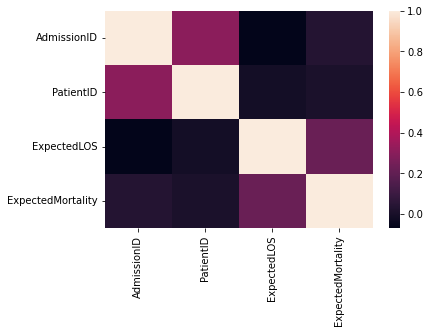

In [38]:
sb.heatmap(Discharges.corr())
plt.show()

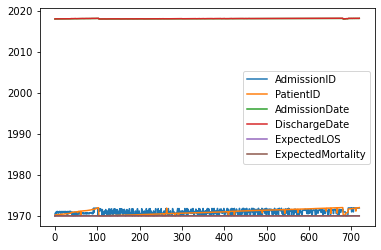

In [41]:
Discharges.plot()
plt.show()

### 55.Statistics for Data analysis

In [42]:
mean1=Discharges['ExpectedLOS'].mean()
mean1


8.82458915915616

In [44]:
Maximum=Discharges['ExpectedLOS'].max()
Maximum

16.998213188933306

In [45]:
Minimum=Discharges['ExpectedLOS'].min()
Minimum

2.0129739231354193

In [46]:
Median=Discharges['ExpectedLOS'].median()
Median

8.633825356915757